### Importing libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Setting the index numbering as date

In [5]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.set_index("Date",inplace=True)
df.head()

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2010-07-18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2010-07-19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2010-07-20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
2010-07-21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Checking for NULL values

In [6]:
df.isnull().values.any()

False

### Total number of missing values

In [10]:
df.isnull().sum()

priceUSD         0
transactions     0
size             0
sentbyaddress    0
difficulty       0
                ..
price3rocUSD     0
price7rocUSD     0
price14rocUSD    0
price30rocUSD    0
price90rocUSD    0
Length: 736, dtype: int64

### Printing column names with missing values

In [8]:
missed=pd.DataFrame()
missed['column']=df.columns
missed

,column
0,priceUSD
1,transactions
2,size
3,sentbyaddress
4,difficulty
...,...
731,price3rocUSD
732,price7rocUSD
733,price14rocUSD
734,price30rocUSD


### Finding percentage of missing values in each column

In [9]:
missed['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]

missed = missed.sort_values('percent',ascending=False)
missed

,column,percent
0,priceUSD,0.0
494,transactionvalue30stdUSD,0.0
485,transactionvalue90trxUSD,0.0
486,transactionvalue3momUSD,0.0
487,transactionvalue7momUSD,0.0
...,...,...
247,mining_profitability7ema,0.0
248,mining_profitability14ema,0.0
249,mining_profitability30ema,0.0
250,mining_profitability90ema,0.0


### Visualizing the price of BTC in 30 days

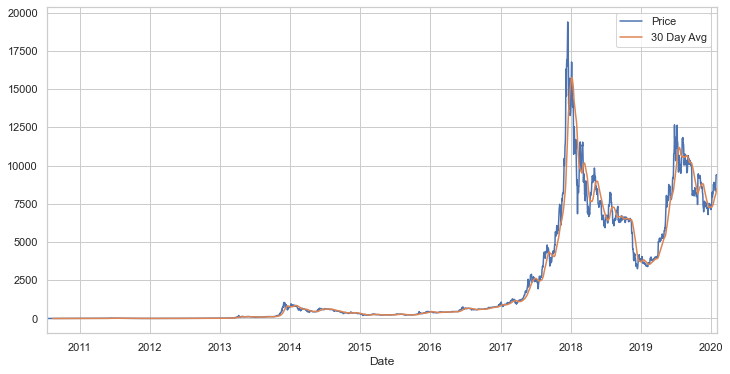

In [14]:
sns.set()
sns.set_style('whitegrid')
df['priceUSD'].plot(figsize=(12,6),label='Price')
#.rolling().mean() calculating the moving mean in pandas
df['priceUSD'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()
plt.show()

### Plotting the nuber of transactions on 30 day average basis

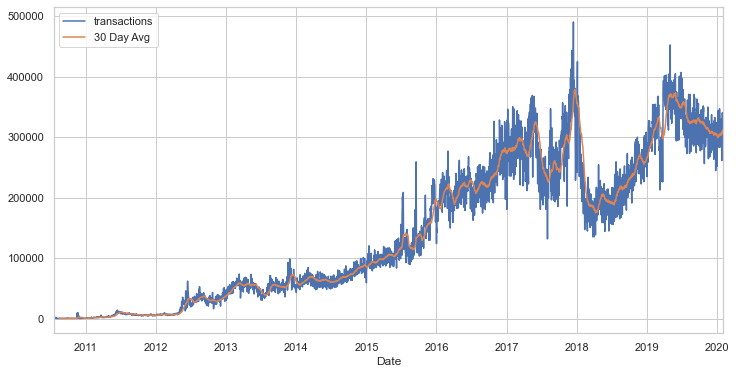

In [15]:
sns.set()
sns.set_style('whitegrid')
df['transactions'].plot(figsize=(12,6),label='transactions')
df['transactions'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()
plt.show()

### Dropping the priceUSD column as storing it in 'Y'

In [16]:
df1=df.reset_index(drop=True)
X=df1.drop('priceUSD',1)
X

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20152\3967982913.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df1.drop('priceUSD',1)


,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,235,649.653,390,1.815430e+02,2.775561e+09,154298.000,1.193000e+03,0.000010,0.000,8.324,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,248,765.285,424,1.815430e+02,1.554461e+09,401834.000,2.620000e+03,0.000243,0.000,8.372,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,354,756.040,553,1.815430e+02,1.551287e+09,481473.000,4.048000e+03,0.000022,0.000,8.276,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,413,984.707,632,1.815430e+02,1.640430e+09,431831.000,2.341000e+03,0.000000,0.000,7.956,...,82.751,0.000,0.000,0.000,0.000,58.099,0.000,0.000,0.000,0.000
4,256,542.483,440,1.815430e+02,1.723493e+09,460783.000,2.122000e+03,0.000000,0.000,6.957,...,78.603,0.000,0.000,0.000,0.000,5.652,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,340402,706867.000,433958,1.546610e+13,1.157542e+20,0.163,8.336367e+09,0.561000,0.221,9.000,...,93.577,80.644,73.588,64.882,54.040,10.430,7.538,6.497,26.536,1.663
3484,332402,704883.000,416980,1.546610e+13,1.253033e+20,0.148,1.365361e+10,0.555000,0.213,9.231,...,94.137,81.436,74.176,65.272,54.195,7.432,10.930,8.061,28.817,2.376
3485,334290,770486.000,398021,1.546610e+13,1.113635e+20,0.153,1.126273e+10,0.631000,0.270,10.000,...,87.140,79.116,73.100,64.815,54.082,3.505,11.368,5.611,29.412,0.800
3486,303573,650769.000,338567,1.546610e+13,1.201317e+20,0.149,7.668679e+09,0.541000,0.219,9.536,...,88.385,79.762,73.498,65.058,54.175,0.473,12.499,5.457,31.791,1.606


In [17]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)


### Applying Dimensionality reduction on Scaled data

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [44]:
scaled_data.shape

(3488, 736)

In [45]:
x_pca.shape

(3488, 108)

### Performing train_test_split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Applying dimensionality reduction 

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [48]:
X_train.shape

(2790, 1)

In [49]:
X_test.shape

(698, 1)